In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
X=df.drop(['Outcome'],axis='columns')
Y=df['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [4]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=6)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
203,2,99,70,16,44,20.4,0.235,27
287,1,119,86,39,220,45.6,0.808,29
273,1,71,78,50,45,33.2,0.422,21
414,0,138,60,35,167,34.6,0.534,21
468,8,120,0,0,0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
335,0,165,76,43,255,47.9,0.259,26
365,5,99,54,28,83,34.0,0.499,30
618,9,112,82,24,0,28.2,1.282,50
227,3,162,52,38,0,37.2,0.652,24


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_predicted=lr.predict(X_test)

for i in range(len(Y_predicted)):
    if Y_predicted[i]<0.5:
        Y_predicted[i]=0
    else:
        Y_predicted[i]=1
        
print("First Five Test Values:")
print(np.array(Y_test[0:5]))
print("First Five Predicted Values:")
print(Y_predicted[0:5])

First Five Test Values:
[0 1 0 0 0]
First Five Predicted Values:
[0. 0. 0. 0. 0.]


In [7]:
lr.coef_

array([ 0.01746668,  0.00631638, -0.00218284,  0.00055762, -0.00030238,
        0.01363866,  0.15105443,  0.00178077])

In [8]:
lr.intercept_

-0.8843715187664638

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn1=KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train,Y_train)
Y_predicted=knn1.predict(X_test)
print("First Five Test Values:")
print(np.array(Y_test[0:5]))
print("First Five Predicted Values:")
print(Y_predicted[0:5])
print(knn1.score(X_test,Y_test))

First Five Test Values:
[0 1 0 0 0]
First Five Predicted Values:
[0 0 1 0 0]
0.7142857142857143


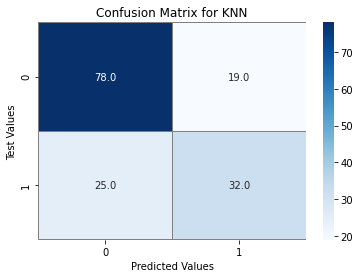

In [10]:
matrix=metrics.confusion_matrix(Y_predicted,Y_test)
sns.heatmap(matrix,annot=True,linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Values")
plt.title("Confusion Matrix for KNN")
plt.show()